In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install statsmodels

In [3]:
# load a timeseries inbuilt datasets
from statsmodels.datasets import get_rdataset
data=get_rdataset('AirPassengers').data

In [4]:
data.head()

,time,value
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


In [5]:
print(data.columns)

Index(['time', 'value'], dtype='object')


In [6]:
data.set_index('time',inplace=True)

In [7]:
data.head()

,value
time,
1949.000000,112
1949.083333,118
1949.166667,132
1949.250000,129
1949.333333,121


### Visualization

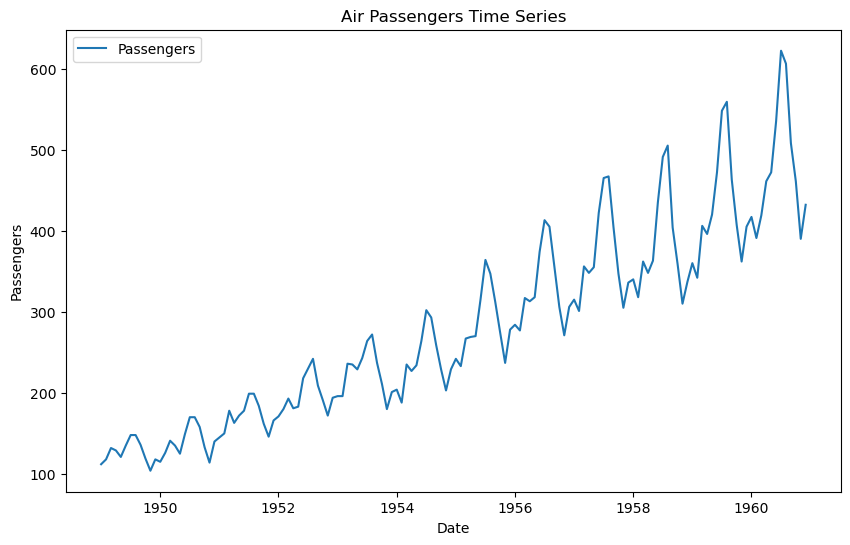

In [8]:
#lineplot
plt.figure(figsize=(10,6))
plt.plot(data.index, data['value'], label='Passengers')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.title('Air Passengers Time Series')
plt.legend()
plt.show()

#### Information and description of the data

In [9]:
from statsmodels.datasets import co2

In [10]:
data=co2.load_pandas().data
data.index= pd.to_datetime(data.index)
#rename column to passengers
data.columns= ['Passengers']

In [11]:
data.head()

,Passengers
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


In [12]:
data. info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2284 entries, 1958-03-29 to 2001-12-29
Freq: W-SAT
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Passengers  2225 non-null   float64
dtypes: float64(1)
memory usage: 35.7 KB


In [13]:
data.describe()


,Passengers
count,2225.000000
mean,340.142247
std,17.003885
min,313.000000
25%,324.800000
50%,338.300000
75%,354.800000
max,373.900000


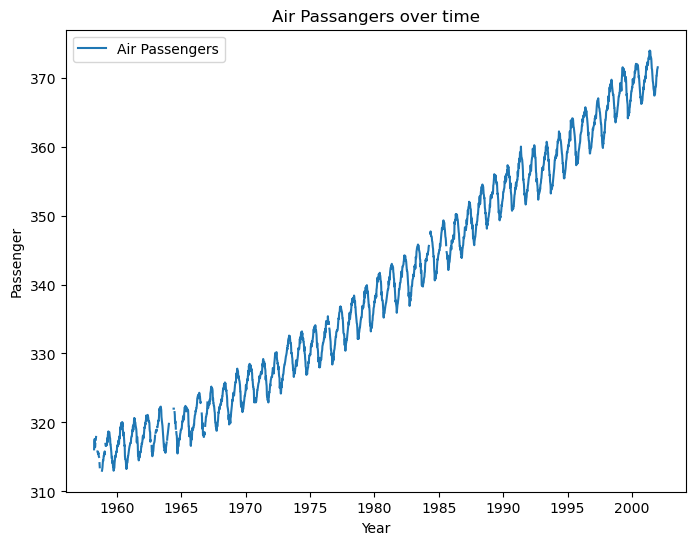

In [14]:
#plot a hsitogram to check the distribution of the passengers
plt.figure(figsize=(8,6))
plt.plot(data.index, data['Passengers'], label='Air Passengers')
plt.xlabel('Year')
plt.ylabel('Passenger')
plt.title('Air Passangers over time')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

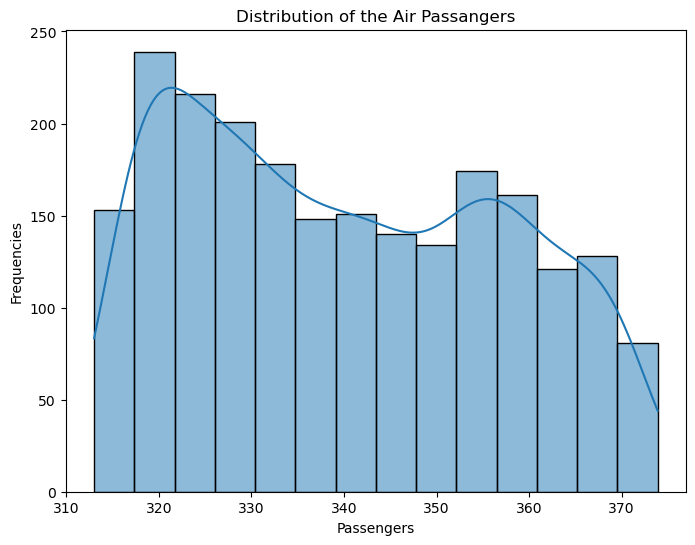

In [15]:
plt.figure(figsize=(8,6))
sns.histplot(data['Passengers'], kde=True)
plt.xlabel('Passengers')
plt.ylabel('Frequencies')
plt.title('Distribution of the Air Passangers')
plt.show

### Rolling Mean and Standard Deviation

In [16]:
#define a function
def plot_rolling_statistics(timeseries, window=12):
    rolling_mean= timeseries.rolling(window=window).mean()
    rolling_std= timeseries.rolling(window=window).std()
    plt.figure(figsize=(12,6))
    plt.plot(timeseries, label='Original')
    plt.plot(rolling_mean, label='Rolling Mean')
    plt.plot(rolling_std, label = 'Rolling STD')
    plt.legend()
    plt.title('Rolling mean & Standard Deviation')
    plt.show()


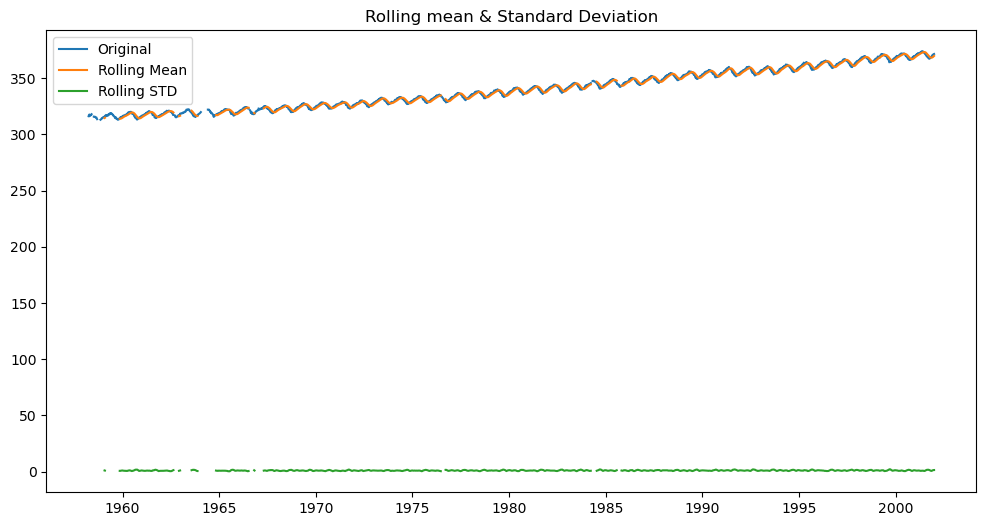

In [17]:
plot_rolling_statistics(data['Passengers'])

In [22]:
#define a function for creating a seasonal subseries of our plot
def seasonal_subseries_plots(timeseries, period=12):
    plt.figure(figsize=(12,6))
    for i in range (period):
        plt.subplot(period,1, i+1)
        plt.plot(timeseries[timeseries.index.month==(i+1)].index.day,
                timeseries[timeseries.index.month==(i+1)]['Passengers'])
        plt.title('Month'+ str(i+1))
    plt.tight_layout()
    plt.show()

/var/folders/yf/4tfxblkd2_38bz7mb8y7b9m40000gn/T/ipykernel_16848/1178443081.py:9: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


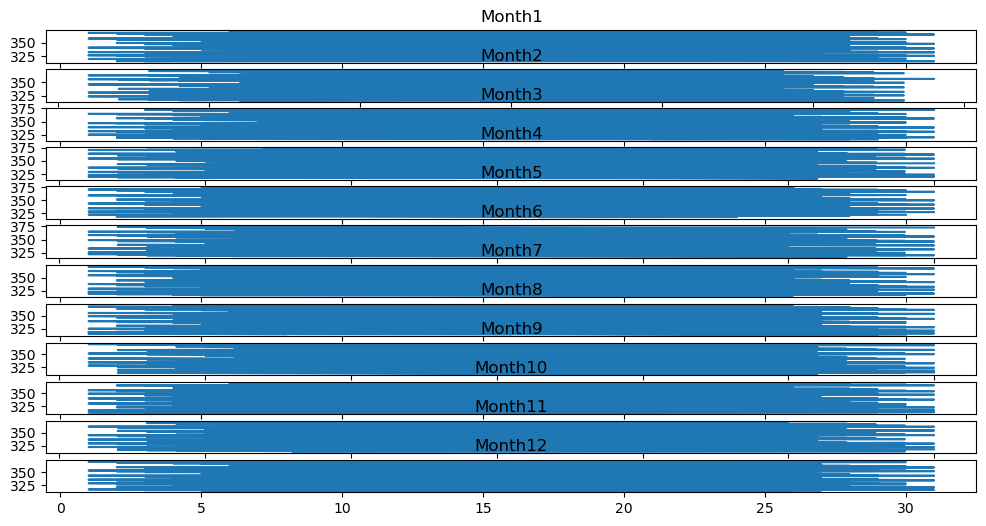

In [23]:
# call the function
seasonal_subseries_plots(data)

In [24]:
from statsmodels.graphics.tsaplots  import plot_acf, plot_pacf

/Users/sharonokech/anaconda3/lib/python3.10/site-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


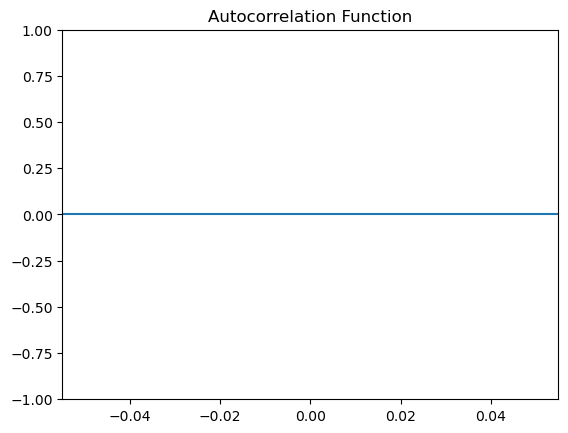

In [26]:
#ACF Plot
plot_acf(data['Passengers'], lags=40)
plt.title('Autocorrelation Function')
plt.show()

/Users/sharonokech/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


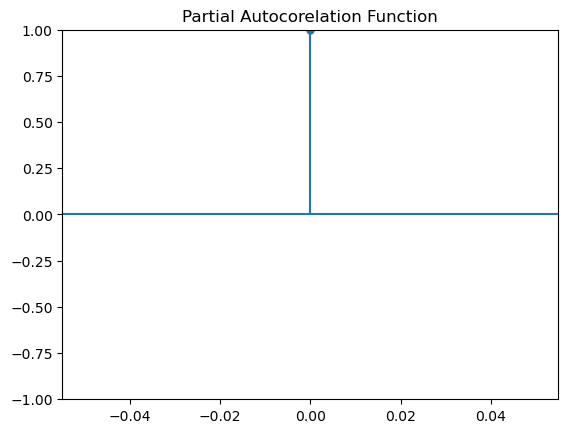

In [31]:
#PACF Plot
plot_pacf(data['Passengers'],lags=40)
plt.title('Partial Autocorelation Function')
plt.show()